# Learning Text Representation
Neural networks require only numerical inputs. Therefore, we transform textual input into vector or numeric representations and then feed them into the network. The input text can be converted to numeric representation using a variety of techniques. Some of the popular methods include **term frequency-inverse
 document frequency (tf-idf), bag of words (BOW)**, and so on.

# Understanding the word2vec model


Let us consider the following text: ***Archie used to live in New
 York, he then moved to Santa Clara. He loves apples and strawberries.***

As you can
 see in the following figure, words *apples* and *strawberries* are plotted close
 together, and *New York* and *Santa Clara* are plotted close together. They are
 plotted close together because the word2vec model has learned that *apples*
 and *strawberries* are similar entities that is, fruits and *New York* and *Santa
 Clara* are similar entities, that is cities, and so their vectors (embeddings) are
 similar to each other, and which is why the distance between them is less.
 Thus, with word2vec model, we can learn the meaningful vector
 representation of a word which helps the neural networks to understand what
 the word is about.

 There are
 two types of word2vec models for learning the embeddings of a word:

1. CBOW model
2. Skip-gram model


# Understanding the CBOW model

Let's consider the sentence, *The Sun rises in the east* with the word *rises* as
 the target word. If we set the window size as 2, then we take the words the
 and *sun*, which are the two words before, and in and the which are the two
 words after the target word rises as context words, as shown in the following
 figure:

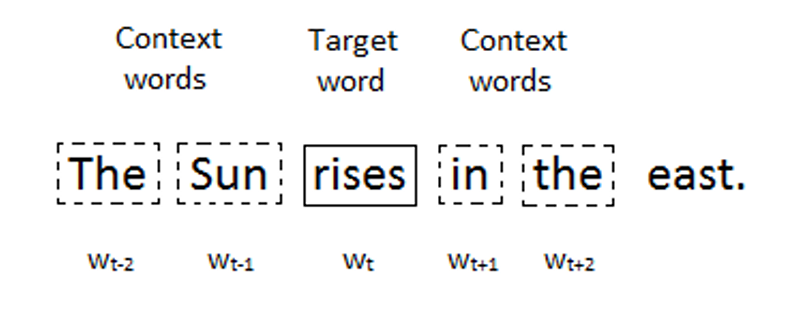

 We convert all the words in the given sentence into a
 numeric form using the one-hot encoding technique, as shown in the following
 figure:

 $$the = [10000]$$
  $$sun = [01000]$$
$$rises = [00100]$$
$$in = [00010]$$
$$east = [00001]$$

The architecture of the CBOW model is shown in the following figure. As you
 can see, we feed the context words, the, sun, in, and the, as inputs to the
 network and it predicts the target word rises as an output:

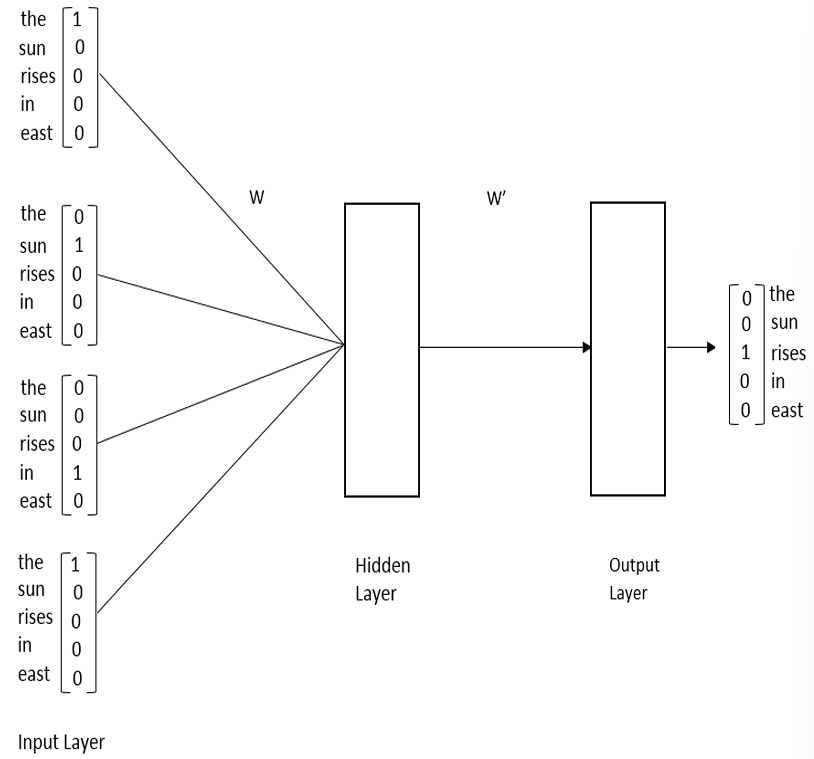

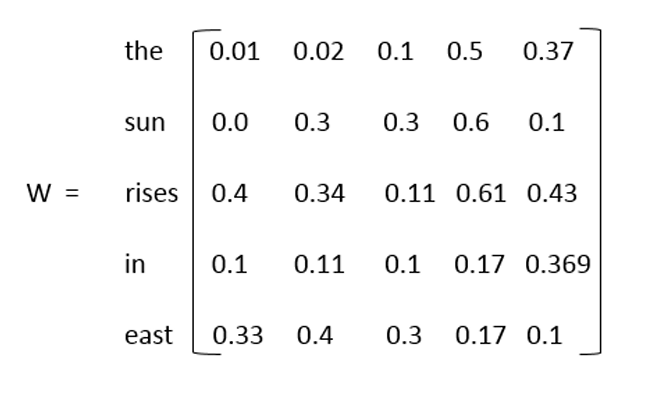

Thus, the CBOW model learns to predict the target word with the given
 context words. It learns to predict the correct target word using gradient
 descent. During training, it updates the weights of the network through
 gradient descent and finds the optimal weights with which we can predict the
 correct target word.

 # CBOW with a single context word

In CBOW model with a single context
 word, we will have only one context word, that is, **C = 1** . So, the network
 takes only one context word as an input and returns one target word as an
 output.

 Before going ahead, first, let's familiarize ourselves with the notations. All the
 unique words we have in our corpus is called the vocabulary. Considering
 the example we saw in the Understanding the CBOW model section, we have
 five unique words in the sentence—*the, sun, rises, in, and east*. These five
 words are our vocabulary.

Let **U** denote the size of the vocabulary (that is, number of words) and **N**
denotes the number of neurons in the hidden layer. We learned that we have
 one input, one hidden, and one output layer:

 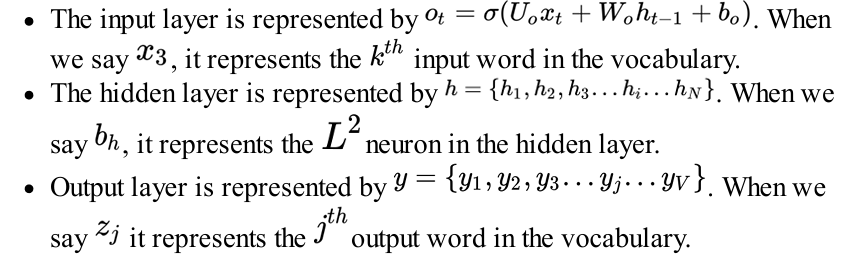

 The following figure will help us to attain clarity on the notations:

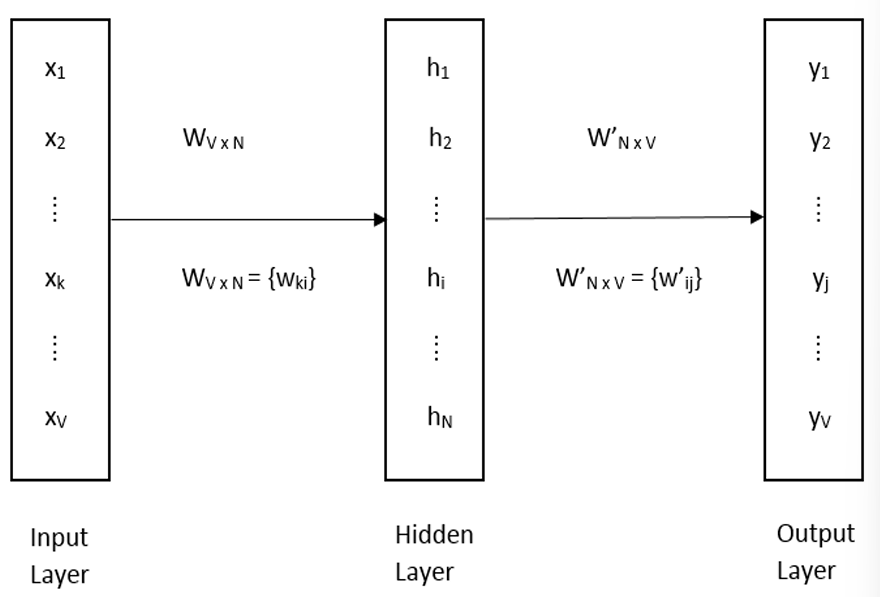

# Forward propagation

In order to predict target words given a context word, we need to perform
forward propagation.

First, we multiply the input $z_j$ with the input to hidden layer weight $W$:
$$ h = XW^T$$

We know each of the input words is one-hot encoded, so when we multiply
with , we basically obtain the $k^{th}$ row of  to . So, we can directly
 write as follows:
$$h = W_{(k,.)}$$

$W_{(k,.)}$ basically implies the vector representation of the input word. Let's
 denote the vector representation for the input word $w_1$ by $Z_{wI}$. So, the
 previous equation can be written as follows:


$$\theta = \alpha.∇ \theta J(\theta)$$
 Now we are in the hidden layer $h$ and we have another set of weight, which is
 hidden to output layer weight,$W'$ . We know that we have $U$ number of words
 in our vocabulary and we need to compute the probability for each of the
 words in our vocabulary to be the target word.

 Let $x_j$  denote the score for the $j^{th}$ word in our vocabulary to be a target word.
 The score $x_j$ is computed by multiplying the value of hidden layer $h$ and the
 hidden to output layer weight $W'$. Since we are calculating the score for a
 word $j$, we multiply the hidden layer $h$ with the $j^{th}$ column of the matrix, $W'_{ij}$.

 $$ u_j = W'^T_{ij} . h$$

 The $j^{th}$ column of the weight matrix $u_j = W'^T_{ij}$ basically denotes the vector
 representation of the word $j$. Let's denote the vector representation of the
word $j^{th}$ by ${Z'_w}^T_j$. So, the preceding equation can be written as follows:

$$ u_j ={Z'_w}^T_j.h   \cdots (2)$$
Substituting equation (1) in equation (2), we can write the following:
$$ u_j ={Z'_w}^T_j.Z_{wi}$$

We can write our output as follows:
$$y_j = \frac{exp(u_j)}{\sum_{j' = 1}^{V} exp(u'_j)} .....(3)$$

Here, $z_j$ tells us the probability for a word $j$ to the target word given an input
 context word. We compute the probability for all the words in our vocabulary
 and select the word that has a high probability as the target word.

  Our goal is to find the correct target word. Let $y^*_j$ denote the probability of the
 correct target word. So, we need to maximize this probability:
 $$max(y^*_j)$$
  Instead of maximizing the raw probabilities, we maximize the log
 probabilities:
  $$max ( log(y_j)^*)$$


Now we have a maximization objective, we need to convert this to a
 minimization objective so that we can apply our favorite gradient descent
 algorithm for minimizing the objective function. How can we change our
 maximization objective to the minimization objective? We can do that by
 simply adding the negative sign. So our objective function becomes the
 following:
 $$min -log(y_j*)$$
  The loss function can be given as follows:
$$L =  -log(y_j*)....(4)$$
Substituting equation (3) in equation (4), we get the following:
$$L = -log(\frac{exp(u_j*)}{\sum_{j' = 1}^{V} exp(u'_j)})$$
According to the logarithm quotient rule, *log(a/b) = log(a) - log(b)*, we can
 rewrite the previous equation as follows:

 $$L = -(log(exp u_{j*}) - log(\sum_{j' = 1}^{V} exp(u'_j))$$
$$ = -log(exp u_{j*}) + log(\sum_{j' = 1}^{V} exp(u'_j))$$

 We know that *log* and *exp* cancel each other, so we can cancel the *log* and *exp*
 in the first term and our final loss function becomes the following:
$$L = -u_{j*} + log(\sum_{j' = 1}^{V} exp(u'_j))$$



# Backward propagation
We minimize the loss function using the gradient descent algorithm. So, we
 backpropagate the network, calculate the gradient of the loss function with
 respect to weights, and update the weights. We have two sets of weights, input
 to hidden layer weight  and hidden to output layer weights . We
 calculate gradients of loss with respect to both of these weights and update
 them according to the weight update rule:

 $$W = W - α\frac{δJ}{δW}$$
 $$W' = W' - α\frac{δJ}{δW'}$$

 In order to better understand the backpropagation, let's recollect the steps
 involved in the forward propagation:
$$h = XW^T$$
$$ u_j = W'^T_{ij} . h$$
$$L = -u_{j*} + log(\sum_{j' = 1}^{V} exp(u'_j))$$

 First, we compute the gradients of loss with respect to the hidden to output
 layer $W'$. We cannot calculate the gradient of loss $L$  with respect to $W'$
directly from $L$, as there is no $W'$ term in the loss function $L$, so we apply the
 chain rule as follows:
 $$\frac{δL}{δW'_{ij}} = \frac{δL}{δu_{j}}.\frac{δu_{j}}{δW'_{ij}} $$



 The derivative of the first term is as follows:
  $$\frac{δJ}{δW_{hy}} = \frac{δJ}{δŷ}.\frac{dz_2}{dW_{hy}}....(1)$$
   Here, $z_j$ is the error term, which is the difference between the actual word
 and predicted word.
  Now, we will calculate the derivative of the second term.
  Since we know $ u_j = W'^T_{ij} . h$:

  $$\frac{δu_{j}}{δW'_{ij}} = h$$
 Thus, the gradient of loss $L$ with respect to $W'$ is given as:
$$\frac{δL}{δW'_{ij}} = e_j. h$$


 Now, we compute the gradient with respect to the input to hidden layer weight $W$
 . We cannot calculate the derivative directly from $L$, as there is no $W$ term
 in $L$, so we apply the chain rule as follows:
   $$\frac{δL}{δW_{ki}} = \frac{δL}{δh_i}.\frac{δh_i}{δW_{ki}}$$

 In order to compute the derivative of the first term in the preceding equation,
 we again apply the chain rule, as we cannot compute the derivative of $L$ with
 respect to $b_h$ directly from $L$:
$$\frac{δL}{δh_{i}} =\sum_{j = 1}^{V} \frac{δL}{δu_j}.\frac{δu_j}{δh_{i}}$$

From equation (5), we can write:

$$\frac{δL}{δh_{i}} =\sum_{j = 1}^{V} e_j.\frac{δu_j}{δh_{i}}$$

Since we know $u_j = W'^T_{ij} . h$

$$\frac{δL}{δh_{i}} =\sum_{j = 1}^{V} e_j.W'^T_{ij}$$
Instead of having the sum, we can write:
$$\frac{δL}{δh_{i}} =LH^T$$

$LH^T$denotes the sum of the output vector of all words in the vocabulary,
 weighted by their prediction error.

Let's now calculate the derivative of the second term.

 Since we know, $h = XW^T$:

 $$\frac{δh_i}{δW_{ki}} =X$$

 Thus, the gradient of loss $L$ with respect to $W$ is given as:
  $$\frac{δh_i}{δW_{ki}} =LH^T.X$$

  We update the weights of our network using the preceding equation and obtain
 an optimal weights during training. The optimal input to hidden layer weight,
, $W$ becomes the vector representation for the words in our vocabulary.

## Single Context CBOW

In [1]:
import tensorflow as tf
import numpy as np
from functools import reduce

from tqdm.notebook import tqdm

In [2]:
# parameters
sentences = ["The sun rises in the east",]
vocabulary = set()

def add_to_vocabulary(existing_vocab: set[str], new_sentence: str):
    words = new_sentence.lower().split()
    existing_vocab.update(words)

    return existing_vocab

vocabulary = list(reduce(add_to_vocabulary, sentences, vocabulary))

vocabulary = sorted(vocabulary)

vocabulary

['east', 'in', 'rises', 'sun', 'the']

In [3]:
# predicting the next word
input_output: list[tuple[str, str]] = []

for sentence in sentences:
    words = sentence.split()
    len_words = len(words)
    for i,word in enumerate(words):
        input_output.append((word.lower(), words[i+1].lower()))

        if i==len_words - 2:
            break

input_output

[('the', 'sun'),
 ('sun', 'rises'),
 ('rises', 'in'),
 ('in', 'the'),
 ('the', 'east')]

In [4]:
def one_hot_encode_word(word, vocabulary):
    vocab_size = len(vocabulary)
    encoded_word = np.zeros(shape=(vocab_size,))
    encoded_word[vocabulary.index(word.lower())] = 1

    return encoded_word

def decode_encoded_word(encoded_word, vocabulary):
    return vocabulary[np.argmax(encoded_word)]

encoded_input_output = []

for inpt, outpt in input_output:
    encoded_input_output.append((one_hot_encode_word(inpt, vocabulary), one_hot_encode_word(outpt, vocabulary)))

encoded_input_output


[(array([0., 0., 0., 0., 1.]), array([0., 0., 0., 1., 0.])),
 (array([0., 0., 0., 1., 0.]), array([0., 0., 1., 0., 0.])),
 (array([0., 0., 1., 0., 0.]), array([0., 1., 0., 0., 0.])),
 (array([0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 1.])),
 (array([0., 0., 0., 0., 1.]), array([1., 0., 0., 0., 0.]))]

In [5]:
# parameters
vocab_size = len(vocabulary)
hidden_size = 10

W1 = np.random.randn(vocab_size, hidden_size)
W2 = np.random.randn(hidden_size, vocab_size)


In [6]:
def softmax(x):
    sum_exp = sum([np.exp(_x) for _x in x])
    return np.exp(x)/sum_exp

In [7]:
def Single_context_CBOW(x, label, W1, W2, loss: list[float], lr=1e-1):
    #forward propagation
    h = np.dot(W1.T, x) # (hidden_size,)
    u = np.dot(W2.T, h) # (vocab_size,)

    y_pred = softmax(u) # (vocab_size,)

    #error
    e = -label + y_pred # (vocab_size,)
    #backward propagation
    dW2 = np.outer(h, e)
    dW1 = np.outer(x, np.dot(W2, e))

    #update weights
    W1 = W1 - lr * dW1
    W2 = W2 - lr * dW2
    #loss function
    loss.append(-float(u[label == 1]) + np.log(np.sum(np.exp(u))))

    return W1, W2, loss

In [8]:
loss = []
n_epochs = 10

average_loss_per_epoch = []
for epoch in tqdm(range(n_epochs)):
    loss_per_epoch = []
    for enc_input, enc_output in encoded_input_output:
        W1, W2, loss_per_epoch = Single_context_CBOW(enc_input, enc_output, W1, W2, loss_per_epoch)
    average_loss_per_epoch.append(np.average(loss_per_epoch))
    loss.extend(loss_per_epoch)


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-7-eba0f3360749>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss.append(-float(u[label == 1]) + np.log(np.sum(np.exp(u))))


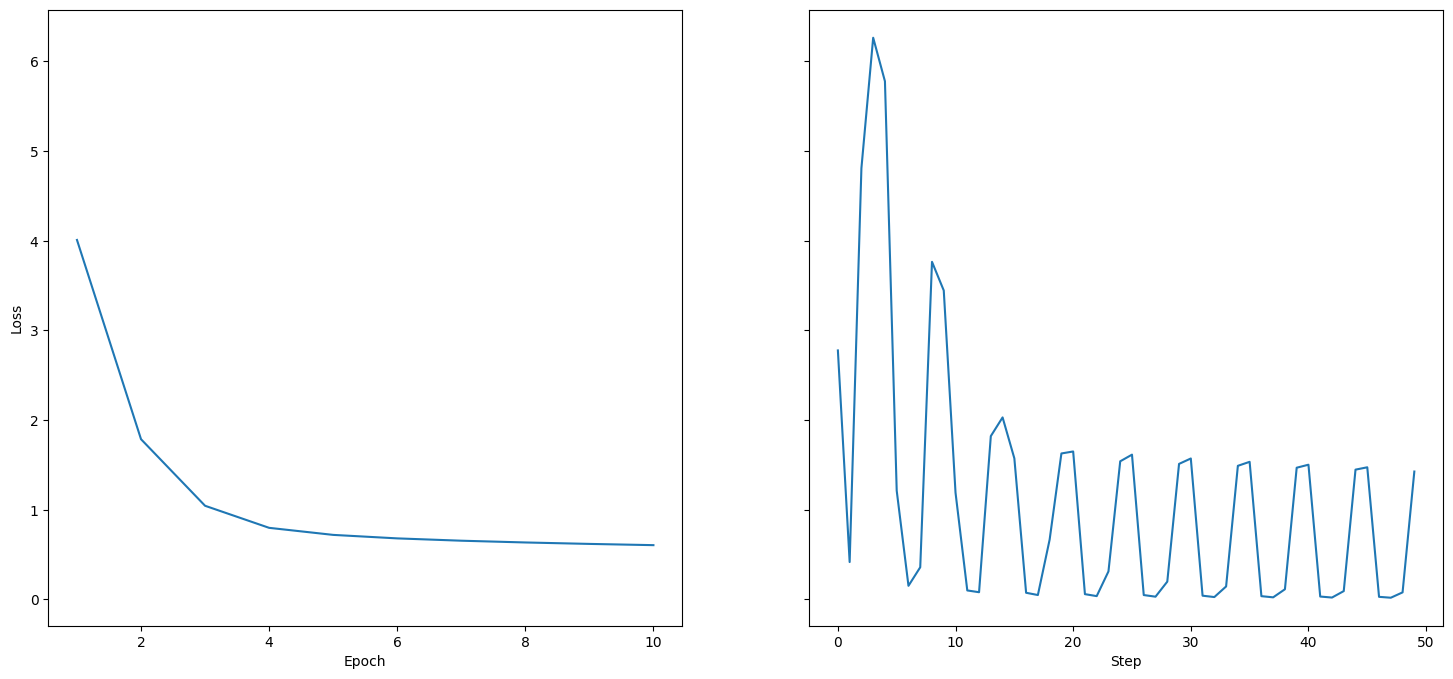

In [9]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
ax1.plot([int(i+1) for i in range(n_epochs)], average_loss_per_epoch)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")

ax2.plot(loss)
ax2.set_xlabel("Step")


plt.show()

##  Building a Word2vec model using genism

In [10]:
import warnings
warnings.filterwarnings(action='ignore')
#data processing
import pandas as pd
import re
from nltk.corpus import stopwords
#modelling
from gensim.models import Word2Vec
from gensim.models import Phrases
from gensim.models.phrases import Phraser

In [11]:
import nltk
nltk.download('stopwords')
stopWords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Loading the dataset

In [12]:
!mkdir -p data
!wget https://github.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/raw/refs/heads/master/Chapter07/data/text.zip -O data/text.zip
!unzip -n data/text.zip -d data
!rm data/text.zip

--2024-12-14 10:47:43--  https://github.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/raw/refs/heads/master/Chapter07/data/text.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/refs/heads/master/Chapter07/data/text.zip [following]
--2024-12-14 10:47:44--  https://raw.githubusercontent.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/refs/heads/master/Chapter07/data/text.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7237538 (6.9M) [application/zip]
Saving to: ‘data/text.zip’

data/text.zip 

In [13]:
data = pd.read_csv('data/text.csv',header=None)

In [14]:
data.head()

,0
0,room kind clean strong smell dogs. generally a...
1,stayed crown plaza april april . staff friendl...
2,booked hotel hotwire lowest price could find. ...
3,stayed husband sons way alaska cruise. loved h...
4,girlfriends stayed celebrate th birthdays. pla...


### Preprocessing and Preparing the dataset

In [15]:
def pre_process(text):
    # convert to lowercase
    text = str(text).lower()

    # remove all special characters and keep only alpha numeric characters andspaces
    text = re.sub(r'[^A-Za-z0-9\s.]',r'',text)

    #remove new lines
    text = re.sub(r'\n',r' ',text)

    # remove stop words
    text = " ".join([word for word in text.split() if word not in stopWords])

    return text

In [16]:
pre_process(data[0][50])

'agree fancy. everything needed. breakfast pool hot tub nice shuttle airport later checkout time. noise issue tough sleep through. awhile forget noisy door nearby noisy guests. complained management later email credit compd us amount requested would return.'

In [17]:
# preprocess the whole dataset
data[0] = data[0].map(lambda x: pre_process(x))

In [18]:
data[0][1].split('.')[:5]

['stayed crown plaza april april ',
 ' staff friendly attentive',
 ' elevators tiny ',
 ' food restaurant delicious priced little high side',
 ' course washington dc']

In [19]:
corpus = []
for line in data[0][1].split('.'):
    words = [x for x in line.split()]
    corpus.append(words)

In [20]:
corpus[:2]

[['stayed', 'crown', 'plaza', 'april', 'april'],
 ['staff', 'friendly', 'attentive']]

In [21]:
data = data[0].map(lambda x: x.split('.'))

corpus = []
for i in (range(len(data))):
    for line in data[i]:
        words = [x for x in line.split()]
        corpus.append(words)

print(corpus[:2])

[['room', 'kind', 'clean', 'strong', 'smell', 'dogs'], ['generally', 'average', 'ok', 'overnight', 'stay', 'youre', 'fussy']]


In [22]:
phrases = Phrases(sentences=corpus,min_count=25,threshold=50)
bigram = Phraser(phrases)
for index,sentence in enumerate(corpus):
    corpus[index] = bigram[sentence]

In [23]:
corpus[111]

['connected', 'rivercenter', 'mall', 'downtown', 'san_antonio']

In [24]:
corpus[9]

['course', 'washington_dc']

### Building the model

In [25]:
size = 100
window_size = 2
epochs = 100
min_count = 2
workers = 4
sg = 1


In [ ]:
model = Word2Vec(corpus, sg=1,window=window_size,vector_size=size, min_count=min_count,workers=workers, epochs=epochs)

In [ ]:
!mkdir -p models

In [ ]:
model.save('./models/word2vec.model')

In [ ]:
model = Word2Vec.load('./models/word2vec.model')

### Evaluating the embeddings

In [ ]:
model.wv.most_similar('san_diego')

[('san_antonio', 0.8043861389160156),
 ('san_francisco', 0.7633268237113953),
 ('phoenix', 0.7479806542396545),
 ('boston', 0.7386451959609985),
 ('memphis', 0.7370901703834534),
 ('la', 0.7338654398918152),
 ('austin', 0.7315337657928467),
 ('dallas', 0.7253897786140442),
 ('indianapolis', 0.7251306772232056),
 ('chicago', 0.7058306932449341)]

In [ ]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.6632123589515686)]

In [ ]:
text = ['los_angeles','indianapolis', 'holiday', 'san_antonio','new_york']
model.wv.doesnt_match(text)

'holiday'

## Visualizing word embeddings in TensorBoard

In [ ]:
import tensorflow as tf

# Ensure compatibility mode is enabled
tf.compat.v1.disable_eager_execution()

from tensorboard.plugins import projector
import gensim

import os

In [ ]:
file_name = "./models/word2vec.model"
model = gensim.models.keyedvectors.KeyedVectors.load(file_name)

In [ ]:
max_size = len(model.wv.key_to_index)-1

max_size

28070

In [ ]:
w2v = np.zeros((max_size,model.layer1_size))


In [ ]:
if not os.path.exists('projections'):
    os.makedirs('projections')

with open("projections/metadata.tsv", 'w+') as file_metadata:
    for i, word in enumerate(model.wv.index_to_key[:max_size]):
        #store the embeddings of the word
        w2v[i] = model.wv[word]
        #write the word to a file
        file_metadata.write(word + '\n')

In [ ]:
sess = tf.compat.v1.InteractiveSession()

In [ ]:
with tf.device("/cpu:0"):
    embedding = tf.compat.v1.Variable(w2v, trainable=False, name='embedding')

In [ ]:
# Define variables
init = tf.compat.v1.global_variables_initializer()


In [ ]:
saver = tf.compat.v1.train.Saver()

In [ ]:
writer = tf.compat.v1.summary.FileWriter('projections', sess.graph)

In [ ]:
config = projector.ProjectorConfig()
embed = config.embeddings.add()

In [ ]:
embed.tensor_name = 'embedding'
embed.metadata_path = 'metadata.tsv'

In [ ]:
# Run the initializer
with tf.compat.v1.Session() as sess:
    sess.run(init)
    projector.visualize_embeddings(writer, config)
    saver.save(sess, 'projections/model.ckpt', global_step=max_size)

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir=projections --port=8000

<IPython.core.display.Javascript object>

## Doc2vec

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import gensim
from gensim.models.doc2vec import TaggedDocument
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
tokenizer = RegexpTokenizer(r'\w+')
stopWords = set(stopwords.words('english'))

### Loading the dataset

In [ ]:
!mkdir -p data
!wget https://github.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/raw/refs/heads/master/Chapter07/data/news_dataset.zip -O data/news_dataset.zip
!unzip -n data/news_dataset.zip -d data
!rm data/news_dataset.zip 1&2 > /dev/null 2>&1

--2024-12-14 11:02:26--  https://github.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/raw/refs/heads/master/Chapter07/data/news_dataset.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/refs/heads/master/Chapter07/data/news_dataset.zip [following]
--2024-12-14 11:02:26--  https://raw.githubusercontent.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/refs/heads/master/Chapter07/data/news_dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5368360 (5.1M) [application/zip]
Saving to: ‘data/n

In [ ]:
docLabels = []
docLabels = [f for f in os.listdir('./data/news_dataset') if f.endswith('.txt')]
data = []

for doc in docLabels:
    with open(f'data/news_dataset/{doc}', 'r', encoding='utf-8', errors='replace') as file:
        data.append(file.read())

In [ ]:
docLabels[:5]

['Science_149.txt',
 'Electronics_975.txt',
 'Sports_798.txt',
 'Sports_759.txt',
 'Politics_671.txt']

In [ ]:
class DocIterator(object):
    def __init__(self, doc_list, labels_list):
        self.labels_list = labels_list
        self.doc_list = doc_list

    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
            yield TaggedDocument(words=doc.split(), tags=[self.labels_list[idx]])

In [ ]:
it = DocIterator(data, docLabels)

In [ ]:
size = 100
alpha = 0.025
min_alpha = 0.025
dm = 1
min_count = 1

In [ ]:
model = gensim.models.Doc2Vec(vector_size=size, min_count=min_count, alpha=alpha,min_alpha=min_alpha, dm=dm)
model.build_vocab(it)

In [ ]:
for epoch in tqdm(range(100)):
    model.train(it,total_examples=120, epochs=1)
    model.alpha -= 0.002
    model.min_alpha = model.alpha

In [ ]:
model.save('models/doc2vec.model')

In [ ]:
d2v_model = gensim.models.doc2vec.Doc2Vec.load('models/doc2vec.model')

In [ ]:
d2v_model.docvecs.most_similar('Sports_1.txt')